# USE CASE: TELECOM INDUSTRY

# Summary

This is a use case on telecom industry where our task is to understand the data, build a logistic regression model using train data and then test the model over test data. After, doing basic data analysis, we drew some inferences. Then we did data visualization by plotting graphs between features and their respective frequencies. Then we built a logistic regression model on the train data and validated it with test data. However, the data is imbalanced and we have to balance the data by oversampling. We then find and plot the confusion matrix. The future work may include regularization, feature selection and using non-linear model.       

In [ ]:
# Customer Churn: Ceases relationship

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
df_train = pd.read_excel("Telecom_Train.xlsx")

In [8]:
df_test = pd.read_excel("Telecom_Test.xlsx")

In [38]:
# WORK on Training data

In [9]:
df_train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
6,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,no
7,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
8,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
9,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
10,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no


In [19]:
df1 = pd.pivot_table(df_train,index = ['state'],columns = 'churn',values = 'account_length',margins=True,aggfunc = 'count')

In [34]:
df1['perc'] = df1['yes']/df1['All']

In [35]:
df1

churn,no,yes,All,perc
state,,,,
AK,49,3,52,0.057692
AL,72,8,80,0.100000
AR,44,11,55,0.200000
AZ,60,4,64,0.062500
CA,25,9,34,0.264706
CO,57,9,66,0.136364
CT,62,12,74,0.162162
DC,49,5,54,0.092593
DE,52,9,61,0.147541


In [37]:
df1.shape # One is All

(52, 4)

In [45]:
df_train.groupby('churn').mean()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
churn,,,,,,,,,,,,,,,
no,100.793684,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
yes,102.664596,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [46]:
# if total charge is high they churned

In [48]:
# People who tend to use lower number of vmails on an average, churned

In [52]:
# Let us group by another variable international plan

In [53]:
df_train.groupby('international_plan').mean()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
international_plan,,,,,,,,,,,,,,,
no,100.742193,8.059801,178.893887,100.410963,30.412495,200.663090,100.074419,17.056565,201.350831,100.027907,9.060877,10.195349,4.465449,2.753279,1.573422
yes,104.071207,8.464396,187.986997,100.665635,31.958390,203.936842,100.486068,17.334923,196.410217,100.851393,8.838483,10.628173,4.609907,2.869907,1.464396


In [54]:
# people who tend to have longer account lengths and more v_mail messages have international plans

In [55]:
df_train.groupby('number_customer_service_calls').mean()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge
number_customer_service_calls,,,,,,,,,,,,,,
0,101.302726,8.143472,181.835438,100.899570,30.912669,201.015352,100.100430,17.086585,202.219369,99.503587,9.100014,10.387231,4.444763,2.805036
1,101.779848,8.433531,179.454953,101.052498,30.507832,202.418459,100.130398,17.205724,200.163929,100.490262,9.007392,10.149111,4.542760,2.740821
2,99.225296,8.291173,176.753755,99.264822,30.048775,200.319368,100.387352,17.027404,200.945982,101.432148,9.042648,10.277339,4.475626,2.775415
3,101.433566,6.825175,183.316550,99.916084,31.164126,198.023776,98.811189,16.832238,202.284382,99.002331,9.102844,10.137063,4.503497,2.737366
4,102.662651,7.500000,184.272289,101.777108,31.326807,202.070482,102.096386,17.175964,199.100602,97.168675,8.959699,10.222892,4.301205,2.760904
5,102.560606,7.257576,175.359091,99.515152,29.811970,198.089394,101.469697,16.838030,191.943939,97.727273,8.638333,10.586364,4.424242,2.858636
6,90.181818,12.909091,151.009091,97.363636,25.671818,197.072727,92.136364,16.751818,202.186364,99.590909,9.098636,10.050000,3.318182,2.714091
7,116.111111,7.666667,156.011111,88.111111,26.522222,218.644444,107.666667,18.584444,202.055556,110.444444,9.092222,9.800000,4.666667,2.645556
8,83.500000,20.000000,180.300000,120.500000,30.650000,200.900000,107.500000,17.075000,195.000000,99.000000,8.775000,8.150000,6.000000,2.200000


In [61]:
# number of customer service calls higher => more voice mail messages
# total day minutes highest and total night minutes highest ...longest customer service calls during night and day

# Data Visualization

In [64]:
# Number of voice mail messages

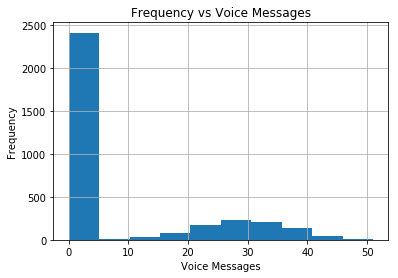

In [60]:
plt.hist(df_train['number_vmail_messages'])
plt.title("Frequency vs Voice Messages")
plt.xlabel("Voice Messages")
plt.ylabel("Frequency")
plt.grid('on')
plt.show()

In [65]:
# Account Length

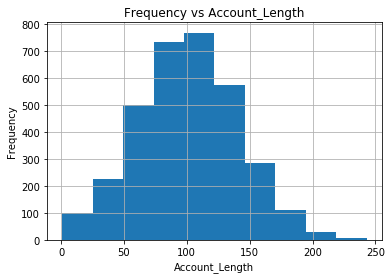

In [63]:
plt.hist(df_train['account_length'])
plt.title("Frequency vs Account_Length")
plt.xlabel("Account_Length")
plt.ylabel("Frequency")
plt.grid('on')
plt.show()

In [99]:
df1 = pd.pivot_table(df_train,index = ['state'],columns = 'churn')

In [83]:
df1

account_length             number_customer_service_calls            \
churn             no         yes                            no       yes   
state                                                                      
AK         94.693878  138.000000                      1.448980  3.333333   
AL         98.125000   97.125000                      1.402778  3.000000   
AR         94.840909  105.545455                      1.522727  3.818182   
AZ        102.166667   75.000000                      1.550000  2.250000   
CA         98.160000  102.222222                      1.360000  1.777778   
CO         99.596491  121.222222                      1.666667  2.555556   
CT         99.903226   94.583333                      1.532258  1.416667   
DC        109.448980   69.200000                      1.306122  1.800000   
DE        101.423077  104.777778                      1.653846  1.444444   
FL        109.163636  112.375000                      1.490909  2.125000   
GA        104.195652  100.125000                      1.869565  2.250000   
HI        105.560000  104.000000                      1.460000  3.000000   
IA         97.195122   55.000000                      1.487805  3.000000   
ID        103.718750  110.000000                      1.484375  3.000000   
IL        101.641509   88.600000                      1.132075  1.200000   
IN        100.290323   99.444444                      1.483871  3.111111   
KS        108.929825   97.384615                      1.315789  1.692308   
KY         95.078431   71.125000                      1.509804  3.000000   
LA        106.000000  134.500000                      1.510638  2.250000   
MA         93.851852   82.090909                      1.185185  1.363636   
MD        102.981132  112.411765                      1.528302  2.235294   
ME        101.897959   81.538462                      1.673469  2.000000   
MI         92.175439  119.250000                      1.403509  2.437500   
MN        100.652174  105.800000                      1.289855  2.733333   
MO         98.125000  102.571429                      1.410714  2.714286   
MS        102.843137   89.214286                      1.529412  2.285714   
MT         89.407407  105.285714                      1.388889  2.571429   
NC        103.122807  113.363636                      1.421053  2.272727   
ND        103.910714  127.666667                      1.446429  1.500000   
NE         98.285714  103.600000                      1.482143  1.200000   
NH        101.468085  104.000000                      1.234043  3.000000   
NJ        102.120000   94.888889                      1.500000  2.166667   
NM        103.267857  114.666667                      1.500000  2.500000   
NV        105.923077   91.214286                      1.442308  2.142857   
NY         95.955882  122.200000                      1.500000  2.666667   
OH        101.955882  103.500000                      1.411765  1.000000   
OK        109.538462  100.888889                      1.807692  1.666667   
OR        100.567164  104.818182                      1.626866  2.363636   
PA        105.513514   97.250000                      1.135135  1.875000   
RI         99.796610  122.666667                      1.355932  2.000000   
SC         91.978261  113.571429                      1.434783  2.071429   
SD        107.500000   92.125000                      1.384615  1.500000   
TN         93.270833   87.400000                      1.145833  3.000000   
TX         95.222222  104.500000                      1.592593  1.666667   
UT        100.500000  103.800000                      1.177419  2.600000   
VA        107.500000   83.400000                      1.597222  1.600000   
VT        104.246154  105.875000                      1.600000  2.875000   
WA        100.442308  108.071429                      1.384615  2.071429   
WI         97.591549  112.000000                      1.380282  1.857143   
WV         95.145833   98.200000                      

In [84]:
# For Arkansas : Account length higher, churned

In [140]:
Y, X = dmatrices('churn ~ account_length + international_plan + voice_mail_plan + number_vmail_messages + total_day_minutes + total_day_calls + total_day_charge + total_eve_minutes + total_eve_calls + total_eve_charge + total_night_minutes + total_night_calls + total_night_charge + total_intl_minutes + total_intl_calls + total_intl_charge + number_customer_service_calls + C(area_code) + C(state)'  , df_train, return_type="dataframe")

In [141]:
print(X.columns)

Index(['Intercept', 'international_plan[T.yes]', 'voice_mail_plan[T.yes]',
       'C(area_code)[T.area_code_415]', 'C(area_code)[T.area_code_510]',
       'C(state)[T.AL]', 'C(state)[T.AR]', 'C(state)[T.AZ]', 'C(state)[T.CA]',
       'C(state)[T.CO]', 'C(state)[T.CT]', 'C(state)[T.DC]', 'C(state)[T.DE]',
       'C(state)[T.FL]', 'C(state)[T.GA]', 'C(state)[T.HI]', 'C(state)[T.IA]',
       'C(state)[T.ID]', 'C(state)[T.IL]', 'C(state)[T.IN]', 'C(state)[T.KS]',
       'C(state)[T.KY]', 'C(state)[T.LA]', 'C(state)[T.MA]', 'C(state)[T.MD]',
       'C(state)[T.ME]', 'C(state)[T.MI]', 'C(state)[T.MN]', 'C(state)[T.MO]',
       'C(state)[T.MS]', 'C(state)[T.MT]', 'C(state)[T.NC]', 'C(state)[T.ND]',
       'C(state)[T.NE]', 'C(state)[T.NH]', 'C(state)[T.NJ]', 'C(state)[T.NM]',
       'C(state)[T.NV]', 'C(state)[T.NY]', 'C(state)[T.OH]', 'C(state)[T.OK]',
       'C(state)[T.OR]', 'C(state)[T.PA]', 'C(state)[T.RI]', 'C(state)[T.SC]',
       'C(state)[T.SD]', 'C(state)[T.TN]', 'C(state)[T.TX]', '

In [142]:
df_train['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

# Logistic Regression

In [143]:
# Instantiate a logistic regression model and fit with X and Y

In [144]:
model = LogisticRegression()

In [282]:
# This is imbalanced data so we have to use balancing by classweight

(array([2850.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         483.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

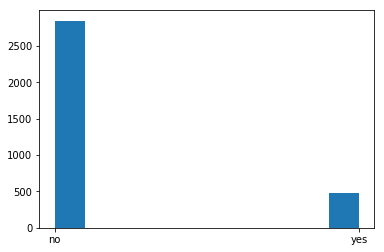

In [281]:
plt.hist(df_train['churn'])

In [258]:
model3 = LogisticRegression(class_weight = 'balanced')

In [155]:
Z = Y['churn[yes]']

In [156]:
Z

1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      1.0
12      0.0
13      0.0
14      0.0
15      0.0
16      1.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      1.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
       ... 
3304    0.0
3305    1.0
3306    0.0
3307    0.0
3308    0.0
3309    0.0
3310    0.0
3311    0.0
3312    0.0
3313    0.0
3314    0.0
3315    0.0
3316    0.0
3317    0.0
3318    0.0
3319    0.0
3320    0.0
3321    1.0
3322    0.0
3323    1.0
3324    1.0
3325    0.0
3326    0.0
3327    0.0
3328    0.0
3329    0.0
3330    0.0
3331    0.0
3332    0.0
3333    0.0
Name: churn[yes], Length: 3333, dtype: float64

In [259]:
model3.fit(X,Z)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [158]:
# check the accuracy on the training set

In [260]:
model3.score(X,Z) # 87 % accuracy

0.7782778277827783

In [261]:
Z.mean()

0.14491449144914492

In [262]:
X

,Intercept,international_plan[T.yes],voice_mail_plan[T.yes],C(area_code)[T.area_code_415],C(area_code)[T.area_code_510],C(state)[T.AL],C(state)[T.AR],C(state)[T.AZ],C(state)[T.CA],C(state)[T.CO],...,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0
2,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0
5,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0
6,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,220.6,101.0,18.75,203.9,118.0,9.18,6.3,6.0,1.70,0.0
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,348.5,108.0,29.62,212.6,118.0,9.57,7.5,7.0,2.03,3.0
8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.1,94.0,8.76,211.8,96.0,9.53,7.1,6.0,1.92,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,351.6,80.0,29.89,215.8,90.0,9.71,8.7,4.0,2.35,1.0
10,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,222.0,111.0,18.87,326.4,97.0,14.69,11.2,5.0,3.02,0.0


In [209]:
# 14.4 % churning

In [210]:
# 86 % accuracy by prediction no churning

In [263]:
Y1, X1 = dmatrices('churn ~ account_length + international_plan + voice_mail_plan + number_vmail_messages + total_day_minutes + total_day_calls + total_day_charge + total_eve_minutes + total_eve_calls + total_eve_charge + total_night_minutes + total_night_calls + total_night_charge + total_intl_minutes + total_intl_calls + total_intl_charge + number_customer_service_calls + C(area_code) + C(state)'  , df_test, return_type="dataframe")

In [264]:
Z1 = Y1['churn[yes]']

In [265]:
# Testing data

In [266]:
#model2 = LogisticRegression()

In [267]:
#model2.fit(X1,Z1)

In [269]:
predicted = model3.predict(X1)

In [270]:
print(predicted)

[0. 0. 1. ... 0. 0. 0.]


In [271]:
print(metrics.accuracy_score(Z1, predicted))

0.7606478704259149


In [272]:
# 87 % which is the same as for training data

In [273]:
from sklearn.metrics import confusion_matrix

In [274]:
print(metrics.confusion_matrix(Z1, predicted))
print (metrics.classification_report(Z1, predicted))

[[1096  347]
 [  52  172]]
             precision    recall  f1-score   support

        0.0       0.95      0.76      0.85      1443
        1.0       0.33      0.77      0.46       224

avg / total       0.87      0.76      0.79      1667



In [275]:
cm = confusion_matrix(Z1, predicted)

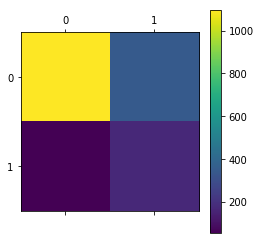

In [276]:
plt.matshow(cm)
plt.colorbar()

In [277]:
# Future Work to improve the model

In [278]:
# including interaction terms = derived terms
# removing features
# regularization : penalize higher beta values
# using a non-linear model - sklearn y = ax1 + bx2 + cx3